In [1]:
import pandas as pd

In [2]:


data=pd.read_csv('Tucker_transcripts_2.5.23.tsv',sep='\t').drop(columns = ['Unnamed: 0'])

In [3]:
data

,url,timestamp,title,text
0,https://www.foxnews.com/opinion/tucker-carlson...,"February 3, 2023 9:59pm EST",TUCKER CARLSON: Biden administration's stance ...,Fox News host Tucker Carlson takes on the Bid...
1,https://www.foxnews.com/opinion/tucker-carlson...,"February 2, 2023 10:32pm EST",TUCKER CARLSON: Hunter Biden versus laptop rep...,Fox News host Tucker Carlson weighs in on new ...
2,https://www.foxnews.com/opinion/tucker-carlson...,"January 31, 2023 10:03pm EST",TUCKER CARLSON: Will we see a whole lot more o...,Fox News host Tucker Carlson weighs in on the...
3,https://www.foxnews.com/opinion/tucker-carlson...,"January 30, 2023 9:49pm EST",TUCKER CARLSON: Why we're paranoid about the A...,Fox News host Tucker Carlson voices his concer...
4,https://www.foxnews.com/opinion/tucker-carlson...,"January 27, 2023 9:52pm EST",TUCKER CARLSON: Another attempt by leaders of ...,WARNING-Graphic footage: Fox News host Tucker ...
...,...,...,...,...
316,https://www.foxnews.com/opinion/tucker-carlson...,"July 1, 2021 1:12am EDT",Tucker Carlson: New York City elections are un...,"'Tucker Carlson Tonight' host slams how 'dumb,..."
317,https://www.foxnews.com/opinion/tucker-carlson...,"June 30, 2021 12:13am EDT",Tucker Carlson: Only Texas has the ability to ...,'Tucker Carlson Tonight' host examines the ong...
318,https://www.foxnews.com/opinion/tucker-carlson...,"June 29, 2021 1:00am EDT",Tucker Carlson: Abolishing the suburbs is majo...,'Tucker Carlson Tonight' host says Biden admin...
319,https://www.foxnews.com/opinion/tucker-carlson...,"June 26, 2021 12:37am EDT",Tucker Carlson: The most sophisticated militar...,'Tucker Carlson Tonight' says Pentagon has cov...


In [5]:
# Load the regular expression library
import re
# Remove punctuation
data['text_processed'] = \
data['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
data['text_processed'] = \
data['text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
data['text_processed'].head()

0     fox news host tucker carlson takes on the bid...
1    fox news host tucker carlson weighs in on new ...
2     fox news host tucker carlson weighs in on the...
3    fox news host tucker carlson voices his concer...
4    warning-graphic footage: fox news host tucker ...
Name: text_processed, dtype: object

In [ ]:
#pip install WordCloud

In [7]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
#long_string = ','.join(list(papers['text_processed'].values))
l = []
for index in data.index:
    #print(index)
    
    long_string = data['text_processed'][index]

    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    # Generate a word cloud
    wordcloud.generate(long_string)
    # add wordcloud image to 'l' list    
    l.append(wordcloud.to_image())

In [11]:
#make new column in data df off of 'l' list 
data['img'] = l

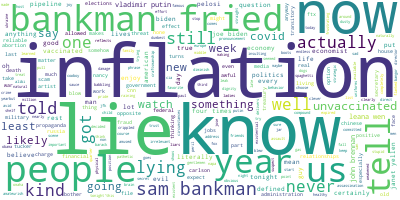

In [12]:
#if you index any image cell it will display the image

data['img'][20]

Messing around with Genism and NLTK:

In [ ]:
#pip install gensim
#pip install nltk

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)

In [ ]:
nltk.download('wordnet')

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'tucker', 'carlson', 'fox', 'news', 'channel', 'host', 'evening', 'welcome', 'tonight'])

stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and token not in stop_words and len(token) > 3:

            result.append(lemmatize_stemming(token))
            
    return result

In [ ]:
'''
Preview a document after preprocessing
'''
document_num = 50
doc_sample = 'This disk has failed many times. I would like to get it replaced.'

print("Original document: ")
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print("\n\nTokenized and lemmatized document: ")
print(preprocess(doc_sample))

In [ ]:
ep1 =  papers['text_processed'][0]
ep1_preprocessed = preprocess(ep1)
#ep1_preprocessed

In [ ]:
processed_docs = []

for transcript in papers.text_processed:
    processed_docs.append(preprocess(transcript))

In [ ]:
'''
Preview 'processed_docs'
'''
#print(processed_docs[:2])



In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [ ]:

'''
Checking dictionary created
'''
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    # if count > 10:
    #     break

In [ ]:
'''
Create the Bag-of-words model for each document i.e for each document we create a dictionary reporting how many
words and how many times those words appear. Save this to 'bow_corpus'
'''
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [ ]:
'''
Preview BOW for our sample preprocessed document
'''
document_num = 1
bow_doc_x = bow_corpus[document_num]

# for i in range(len(bow_doc_x)):
#     print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
#                                                      dictionary[bow_doc_x[i][0]], 
#                                                      bow_doc_x[i][1]))

In [ ]:
'''
Train your lda model using gensim.models.LdaMulticore and save it to 'lda_model'
'''
# TODO
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 15, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [ ]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'tucker', 'carlson', 'fox', 'news', 'channel', 'host', 'evening', 'welcome', 'tonight'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.text_processed.values.tolist()
print(data)
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])